<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/cross_validation_experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset

In [2]:
# load the iris data

iris_df = load_dataset('iris')

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# split the data into X and y

X = iris_df.drop(columns='species')
y = iris_df['species']

In [11]:
# split the data using the hold out approach

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


random_states = np.random.randint(low=0,high=50,size=10)

# make the label encoder object
le = LabelEncoder()

# make the clf object
log_reg = LogisticRegression(max_iter=1000)

all_scores = []

# run the loop and predict on the test data with different random states

for state in random_states:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=state)

    # Label encode the data
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    # fit the model on the training data
    log_reg.fit(X_train,y_train)

    # predict on the test data
    y_pred = log_reg.predict(X_test)

    # calaculate the scores
    score = accuracy_score(y_test,y_pred)
    all_scores.append(score)

for ind,val in enumerate(all_scores,start=1):
    print(f'The score for the iteration number {ind} is {np.round(val,3)}')

print('The mean value of all the scores is',np.mean(np.array(all_scores)))

The score for the iteration number 1 is 1.0
The score for the iteration number 2 is 0.9
The score for the iteration number 3 is 0.967
The score for the iteration number 4 is 1.0
The score for the iteration number 5 is 0.967
The score for the iteration number 6 is 1.0
The score for the iteration number 7 is 0.933
The score for the iteration number 8 is 1.0
The score for the iteration number 9 is 1.0
The score for the iteration number 10 is 1.0
The mean value of all the scores is 0.9766666666666668


In [17]:
from sklearn.model_selection import cross_val_score,LeaveOneOut,KFold

# split using the leave one out approach

# make the clf object
log_reg = LogisticRegression(max_iter=1000)

# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# use the leave one out approach
l_out = LeaveOneOut()

# make the label encoder object
le = LabelEncoder()

# Label encode the data
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.transform(y_test)

# cross validate
cross_val = cross_val_score(estimator=log_reg,X=X_train,y=y_train_trans,
                            scoring='accuracy',cv=l_out,n_jobs=-1)

print('The mean accuracy score is ',np.mean(cross_val))

# shape of the scoring array
cross_val.shape

The mean accuracy score is  0.9583333333333334


(120,)

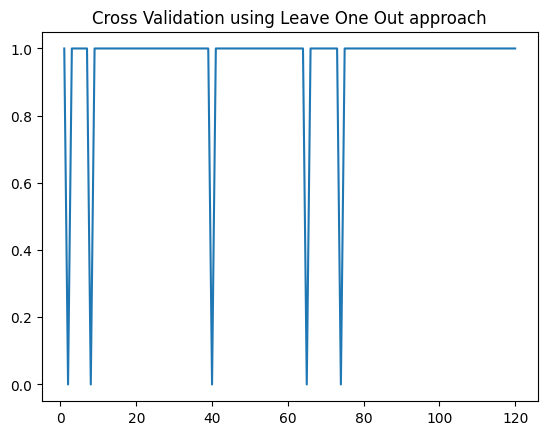

In [18]:
# plot the leave one out data

plt.plot(range(1,121),cross_val)
plt.title('Cross Validation using Leave One Out approach')
plt.show()

In [22]:
# fit the logistic regression model and check the accuracy score on test data

# fit on the train data
log_reg.fit(X_train,y_train_trans)

# predict on the test data
y_pred_loo = log_reg.predict(X_test)

# accuracy score
accuracy_score(y_test_trans,y_pred_loo)

0.9666666666666667

In [23]:
# make the clf object
log_reg = LogisticRegression(max_iter=1000)

# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# use the leave one out approach
k_fold = KFold(n_splits=5,shuffle=True,random_state=76)

# make the label encoder object
le = LabelEncoder()

# Label encode the data
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.transform(y_test)

# cross validate
cross_val = cross_val_score(estimator=log_reg,X=X_train,y=y_train_trans,
                            scoring='accuracy',cv=k_fold,n_jobs=-1)

print('The mean accuracy score is ',np.mean(cross_val))

# shape of the scoring array
cross_val.shape

The mean accuracy score is  0.9666666666666666


(5,)

In [24]:
# fit the logistic regression model and check the accuracy score on test data

# fit on the train data
log_reg.fit(X_train,y_train_trans)

# predict on the test data
y_pred_kfold = log_reg.predict(X_test)

# accuracy score
accuracy_score(y_test_trans,y_pred_kfold)

0.9666666666666667

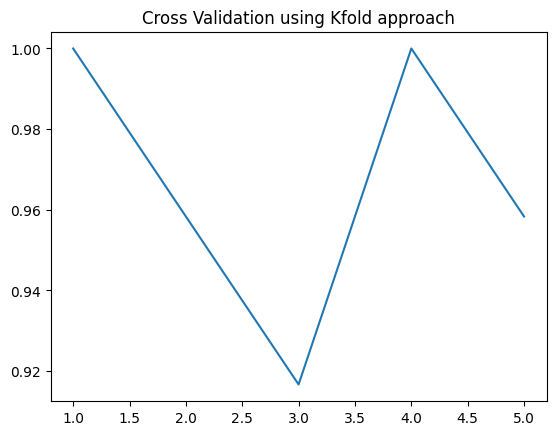

In [26]:
# plot the kfold data

plt.plot(range(1,6),cross_val)
plt.title('Cross Validation using Kfold approach')
plt.show()

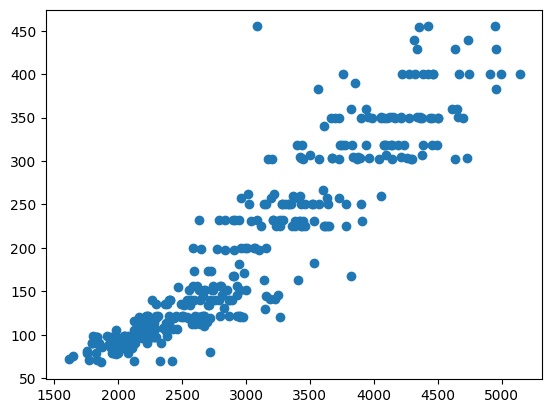

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
auto_mpg = auto_mpg.dropna()

# Define features and target
features = auto_mpg[['Horsepower']]  # Only use 'Horsepower' as a feature
target = auto_mpg['Cylinders']

# plot the input and the target column
plt.scatter(features,target)
plt.show()

In [46]:
auto_mpg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


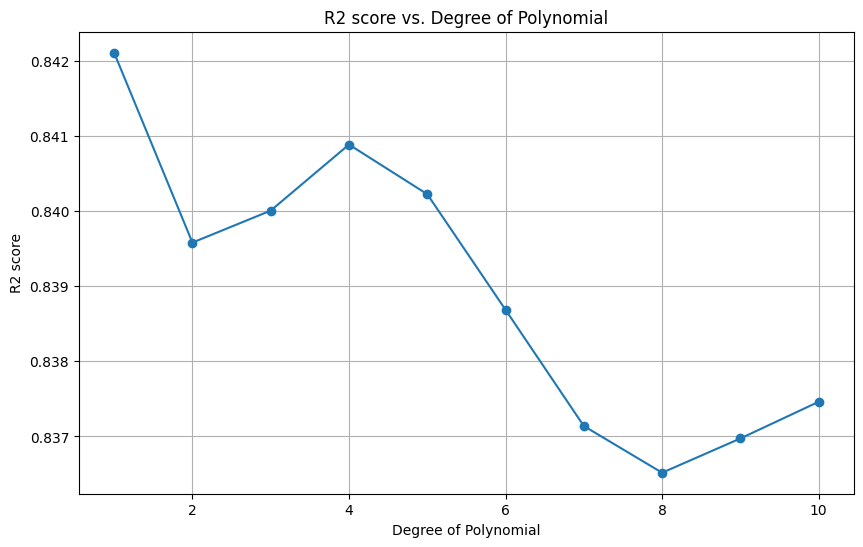

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
auto_mpg = auto_mpg.dropna()

# Define features and target
features = auto_mpg[['Horsepower']]  # Only use 'Horsepower' as a feature
target = auto_mpg['Cylinders']

# List of polynomial degrees
degrees = list(range(1, 11))  # Extend degrees to 10

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=4)

# List to store Mean Squared Errors
score_list = []

for degree in degrees:

    # Add polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model on the polynomial features training data
    model.fit(X_train_poly, y_train)

    # Use the trained model to predict the target values in the test set
    y_pred = model.predict(X_test_poly)

    # Calculate the Mean Squared Error of the model on the test set
    score = r2_score(y_test, y_pred)

    # Store the Mean Squared Error in the list
    score_list.append(score)

# Plot the r2 score as a function of the degree of the polynomial
plt.figure(figsize=(10, 6))
plt.plot(degrees, score_list, marker='o')
plt.title('R2 score vs. Degree of Polynomial')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2 score')
plt.grid(True)
plt.show()


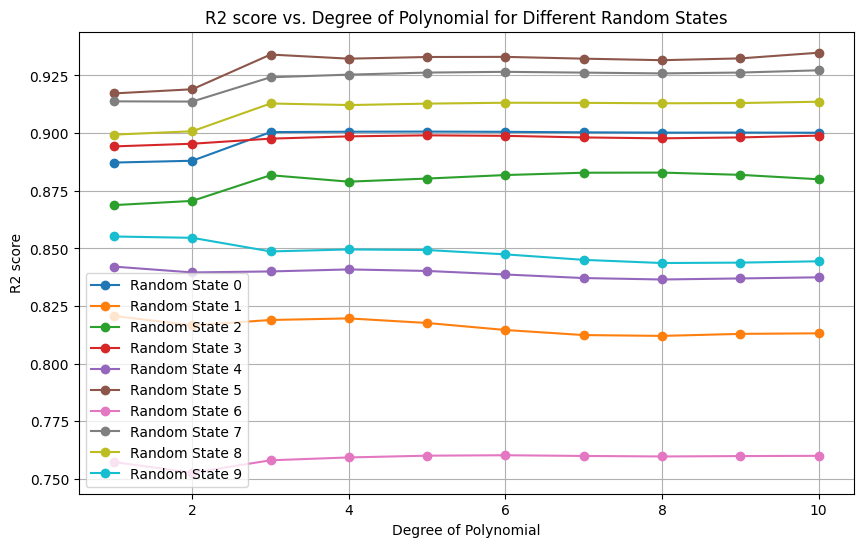

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
auto_mpg = auto_mpg.dropna()

# Define features and target
features = auto_mpg[['Horsepower']]  # Only use 'Horsepower' as a feature
target = auto_mpg['Cylinders']

# List of polynomial degrees
degrees = list(range(1, 11))  # Extend degrees to 10

# List of random states
random_states = list(range(10))

# Create a plot
plt.figure(figsize=(10, 6))

for i, random_state in enumerate(random_states):
    # Split the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=random_state)

    # List to store r2 scores
    score_list = []

    for degree in degrees:
        # Add polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Create a linear regression model
        model = LinearRegression()

        # Train the model on the polynomial features training data
        model.fit(X_train_poly, y_train)

        # Use the trained model to predict the target values in the test set
        y_pred = model.predict(X_test_poly)

        # Calculate the R2 score of the model on the test set
        score = r2_score(y_test, y_pred)

        # Store the R2 score in the list
        score_list.append(score)

    # Plot the R2 score as a function of the degree of the polynomial for the current random state
    plt.plot(degrees, score_list, marker='o', label=f'Random State {random_state}')

plt.title('R2 score vs. Degree of Polynomial for Different Random States')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()


The main difference between the holdout and k-fold cross-validation approaches is:

**Holdout**: In the holdout approach, the dataset is divided into two parts: the training set and the test set. The model is trained on the training set and evaluated on the test set, which was not seen during training. This method is simpler and faster but may result in higher variance in the performance estimate, as it heavily depends on the specific data split.

**k-Fold Cross-Validation**: In k-fold cross-validation, the dataset is divided into k subsets or folds. The model is trained and evaluated k times, each time using a different fold as the validation set and the remaining folds as the training set. This method provides a more robust performance estimate by averaging over multiple iterations, reducing the variance in the estimate. It is often preferred when the dataset is limited and you want a more reliable evaluation of the model's performance.

In summary, the main difference is that holdout uses a single test set for evaluation, while k-fold cross-validation uses multiple validation sets and averages the results for a more stable estimate of model performance.

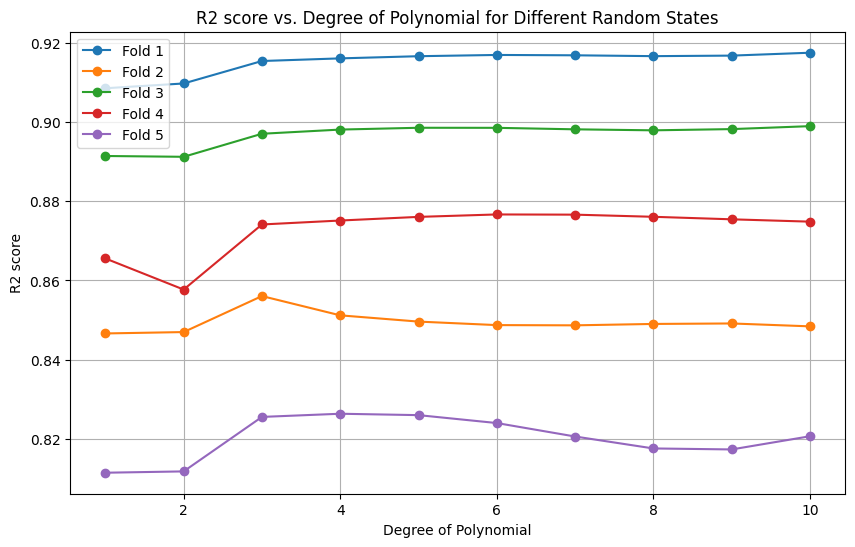

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
auto_mpg = auto_mpg.dropna()

# Define features and target
features = auto_mpg[['Horsepower']]  # Only use 'Horsepower' as a feature
target = auto_mpg['Cylinders']

# List of polynomial degrees
degrees = list(range(1, 11))  # Extend degrees to 10

# Convert to numpy arrays for easier manipulation
X = features.to_numpy()
y = target.to_numpy()

# Create a plot
plt.figure(figsize=(10, 6))

# split the dataset using the kfold approach
k_fold = KFold(n_splits=5,shuffle=True,random_state=42)

for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    # Split the data
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    # List to store r2 scores
    score_list = []

    for degree in degrees:
        # Add polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Create a linear regression model
        model = LinearRegression()

        # Train the model on the polynomial features training data
        model.fit(X_train_poly, y_train)

        # Use the trained model to predict the target values in the test set
        y_pred = model.predict(X_test_poly)

        # Calculate the R2 score of the model on the test set
        score = r2_score(y_test, y_pred)

        # Store the R2 score in the list
        score_list.append(score)

    # Plot the R2 score as a function of the degree of the polynomial for the current random state
    plt.plot(degrees, score_list, marker='o', label=f'Fold {i + 1}')

plt.title('R2 score vs. Degree of Polynomial for Different Random States')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()


The difference in variance between the holdout and k-fold cross-validation approaches primarily arises from how the data is split and the number of iterations used for evaluation. Let's delve into the reasons:

**Holdout Variance**:
- In the holdout approach, you split the data into a single training set and a single test set.
- The performance of the model on the test set is highly dependent on the specific random split of the data.
- If the split happens to include data that is easier or harder for the model to learn from, the performance estimate can vary significantly.
- With only one test set, you have limited information about how the model generalizes to different unseen data.

**k-Fold Cross-Validation Variance**:
- In k-fold cross-validation, the data is divided into k subsets or folds.
- The model is trained and evaluated k times, each time using a different fold as the validation set.
- By repeating the process with different validation sets, you obtain a more comprehensive view of the model's performance across different subsets of the data.
- Averaging the performance scores from the k iterations reduces the impact of a single, potentially biased validation set on the overall performance estimate.
- This averaging leads to a more stable and reliable estimate of how the model is likely to perform on unseen data.

In summary, the difference in variance between holdout and k-fold cross-validation is due to the fact that k-fold cross-validation uses multiple validation sets and averages their results. This process helps mitigate the influence of a single, potentially unrepresentative validation set and provides a more robust estimate of the model's generalization performance.

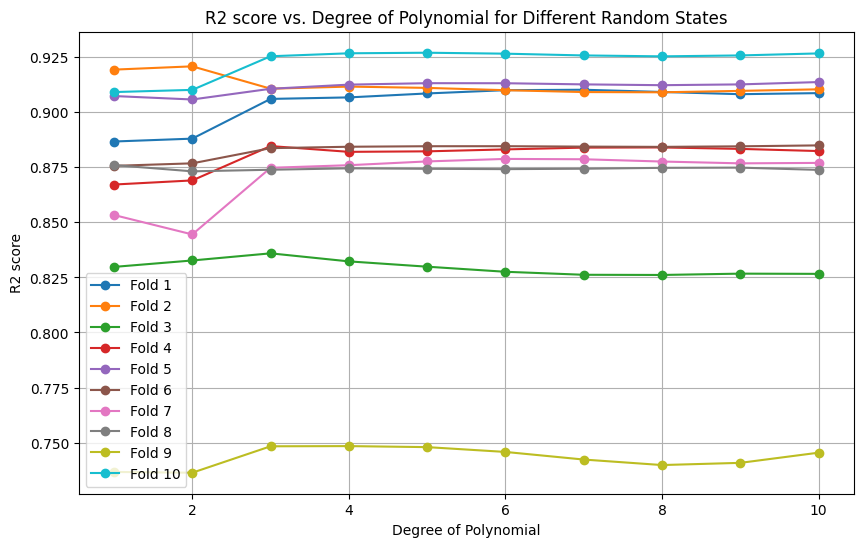

In [51]:
# repeat the same steps keeping cv as 10

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
auto_mpg = auto_mpg.dropna()

# Define features and target
features = auto_mpg[['Horsepower']]  # Only use 'Horsepower' as a feature
target = auto_mpg['Cylinders']

# List of polynomial degrees
degrees = list(range(1, 11))  # Extend degrees to 10

# Convert to numpy arrays for easier manipulation
X = features.to_numpy()
y = target.to_numpy()

# Create a plot
plt.figure(figsize=(10, 6))

# split the dataset using the kfold approach
k_fold = KFold(n_splits=10,shuffle=True,random_state=42)

for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    # Split the data
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    # List to store r2 scores
    score_list = []

    for degree in degrees:
        # Add polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Create a linear regression model
        model = LinearRegression()

        # Train the model on the polynomial features training data
        model.fit(X_train_poly, y_train)

        # Use the trained model to predict the target values in the test set
        y_pred = model.predict(X_test_poly)

        # Calculate the R2 score of the model on the test set
        score = r2_score(y_test, y_pred)

        # Store the R2 score in the list
        score_list.append(score)

    # Plot the R2 score as a function of the degree of the polynomial for the current random state
    plt.plot(degrees, score_list, marker='o', label=f'Fold {i + 1}')

plt.title('R2 score vs. Degree of Polynomial for Different Random States')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()


Increasing the value of k in k-fold cross-validation can have an effect on the variance of scores in the following way:

**Higher k Value (More Splits)**:
- When you increase the value of k (i.e., increase the number of splits), you are dividing your data into more folds.
- This means that each fold will have a smaller portion of the data for validation and a larger portion for training.
- With more iterations (folds), the model is evaluated on a greater variety of validation sets.
- As a result, the performance scores from each iteration may vary more because the validation sets are smaller and potentially more diverse.

Effect on Variance:
- Increasing k tends to increase the variance of the cross-validation scores.
- This is because the model is being evaluated on a larger number of different validation sets, leading to a wider spread of performance scores.

Keep in mind that while increasing k can increase variance, it also provides a more comprehensive assessment of the model's generalization across different subsets of the data. However, excessively large values of k can lead to other issues, such as increased computational complexity and higher sensitivity to noise in the data.

In practice, the choice of k should strike a balance between obtaining a reliable estimate of model performance and managing computational resources. Common choices for k include 5 or 10, but the optimal value can depend on factors like the size of your dataset and the stability of the problem you're working on.

> Smaller "k" values can lead to lower variance due to the limited number of validation sets, but this comes at the cost of potentially higher bias.
Larger "k" values can help reduce bias but might increase variance because the model is evaluated on a wider variety of validation sets.
In summary, the choice of "k" in k-fold cross-validation involves a bias-variance trade-off. Smaller "k" values can result in lower variance but potentially higher bias, while larger "k" values can help reduce bias but might introduce slightly higher variance. The goal is to find a value of "k" that strikes a balance between obtaining a reliable estimate of model performance and managing the computational resources required for cross-validation. Common choices include 5 or 10, but the optimal value can depend on factors like the size of your dataset and the stability of the problem you're working on.





